In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


dir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


<AxesSubplot:>

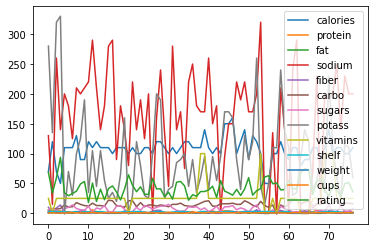

In [17]:
salary_df = pd.read_csv('../../../class-12/demo/cereal/cereal.csv')
salary_df.info()
# salary_df.plot()

Text(0.5, 1.0, 'Salary Data')

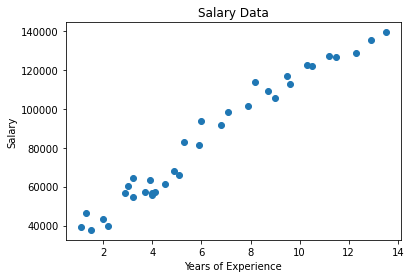

In [3]:
plt.scatter(salary_df["YearsExperience"],salary_df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Data")

In [4]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


We some correlated data. Next we need to  get the data in the form we need for linear regression.

In [5]:
# Selecting Features
X = salary_df["YearsExperience"].values # independent variable, observation
y = salary_df["Salary"].values # depedenct variable

X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5, 11.2, 11.5, 12.3,
       12.9, 13.5])

In [6]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

  We need to split the data, train_test_split expects a Matrix of independent variables as its' first parameter

In [7]:
# We will reshape our vector to a matrix
X = X.reshape(-1,1)
X

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

print(f"x_train shape [{x_train.shape}")
print(f"y_train shape [{x_train.shape}")
print(f"x_test shape [{x_test.shape}")
print(f"y_test shape [{x_test.shape}")
x_test


x_train shape [(28, 1)
y_train shape [(28, 1)
x_test shape [(7, 1)
y_test shape [(7, 1)


array([[12.9],
       [13.5],
       [11.5],
       [ 2.9],
       [ 1.3],
       [ 4.1],
       [ 5.9]])

In [8]:
# Create an instance of the LinearRegression class and use the fit method to train our model

lm = LinearRegression()
lm.fit(x_train,y_train) # y = mx+c

LinearRegression()

In [9]:
y_predict = lm.predict(x_test)

y_predict


array([145190.21247692, 150708.3951762 , 132314.45284525,  53220.50082218,
        38505.34695742,  64256.86622075,  80811.4143186 ])

In [10]:
y_test

array([135675, 139465, 126756,  56642,  46205,  57081,  81363])

Train accuracy 96.07%
Test accuracy 100.0%


Text(0.5, 1.0, 'Trained Model')

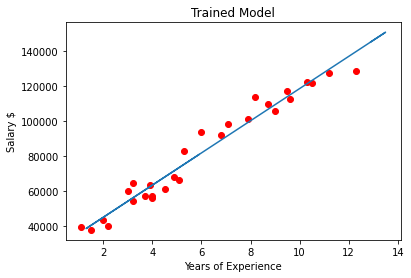

In [11]:
print(f"Train accuracy {round(lm.score(x_train, y_train) * 100, 2)}%")
print(f"Test accuracy {round(lm.score(x_test, y_predict) * 100, 2)}%")

plt.scatter(x_train,y_train, color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Years of Experience")
plt.ylabel("Salary $")
plt.title("Trained Model")